In [17]:
from pandas import DataFrame,Series

In [20]:
import numpy as np
import pandas as pd

In [25]:
data=pd.read_excel('/home/x/桌面/demo/data/catering_sale.xls',index_col=u'日期')

In [27]:
data.head()

,销量
日期,
2015-03-01,51.0
2015-02-28,2618.2
2015-02-27,2608.4
2015-02-26,2651.9
2015-02-25,3442.1


In [28]:
data.describe()

/root/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,销量
count,200.000000
mean,2755.214700
std,751.029772
min,22.000000
25%,NaN
50%,NaN
75%,NaN
max,9106.440000


In [29]:
import matplotlib.pyplot as plt

In [30]:
plt.rcParams['font.sans-serif']=['SimHei']#字体为黑体显示中文标签

In [31]:
plt.rcParams['axes.unicode_minus']=False #正常显示正负号

In [32]:
plt.figure()

In [33]:
p=data.boxplot()#画箱线图

/root/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


In [34]:
x=p['fliers'][0].get_xdata()#使用fliers标注异常值

In [35]:
y=p['fliers'][0].get_ydata()

In [36]:
y.sort()

In [39]:
for i in range(len(x)):
    if i>0:
        plt.annotate(y[i],xy=(x[i],y[i]),xytext=(x[i]+0.05 -0.8/(y[i]-y[i-1]),y[i]))
    else:
         plt.annotate(y[i],xy=(x[i],y[i]),xytext=(x[i]+0.08,y[i]))

/root/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


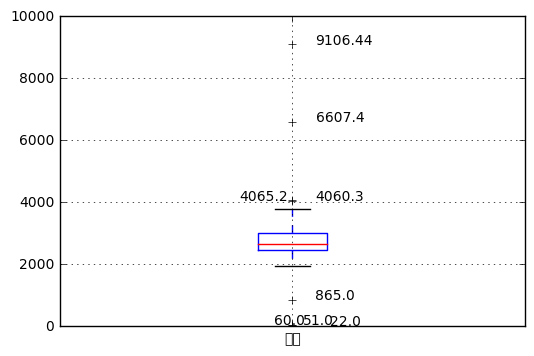

In [40]:
plt.show()

In [41]:
data.count()

销量    200
dtype: int64

In [42]:
data=data[(data['销量']>400)&(data['销量']<5000)]#过滤异常数据

In [43]:
statistics=data.describe()

In [45]:
statistics.loc['range']=statistics.loc['max']-statistics.loc['min']#极差

In [47]:
statistics.loc['var']=statistics.loc['std']/statistics.loc['mean']#变异系数

In [49]:
statistics.loc['dis']=statistics.loc['75%']-statistics.loc['25%']#四分位数

In [53]:
statistics

,销量
count,195.000000
mean,2744.595385
std,424.739407
min,865.000000
25%,2460.600000
50%,2655.900000
75%,3023.200000
max,4065.200000
range,3200.200000
var,0.154755


In [54]:
data1=pd.read_excel('/home/x/桌面/demo/data/catering_dish_profit.xls',index_col=u'菜品名')

In [56]:
data1

,菜品ID,盈利
菜品名,,
A1,17148,9173
A2,17154,5729
A3,109,4811
A4,117,3594
A5,17151,3195
A6,14,3026
A7,2868,2378
A8,397,1970
A9,88,1877


In [58]:
data1=data1['盈利'].copy()

In [62]:
data1.sort(ascending=False)

/root/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  if __name__ == '__main__':


In [63]:
data1

菜品名
A1     9173
A2     5729
A3     4811
A4     3594
A5     3195
A6     3026
A7     2378
A8     1970
A9     1877
A10    1782
Name: 盈利, dtype: int64

In [82]:
import matplotlib.pyplot as plt

In [83]:
plt.rcParams['font.sans-serif']=['SimHei']

In [84]:
plt.rcParams['axes.unicode_minus']=False

In [85]:
plt.figure()

In [86]:
data1.plot(kind='bar')

In [87]:
plt.ylabel(u'盈利(元）')

In [88]:
p=1.0*data1.cumsum()/data1.sum()

In [189]:
p

菜品名
A1     0.244385
A2     0.397016
A3     0.525190
A4     0.620940
A5     0.706061
A6     0.786679
A7     0.850033
A8     0.902518
A9     0.952524
A10    1.000000
Name: 盈利, dtype: float64

In [214]:
p.plot(color='r',secondary_y=True,style='-o',linewidth=2)

In [215]:
plt.annotate(format(p[6],'.4%'),xy=(6,p[6]),xytext=(6*1,p[6]*1),arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=.2"))
#xytext:标签偏移量,

In [216]:
plt.ylabel(u'盈利(比例)')

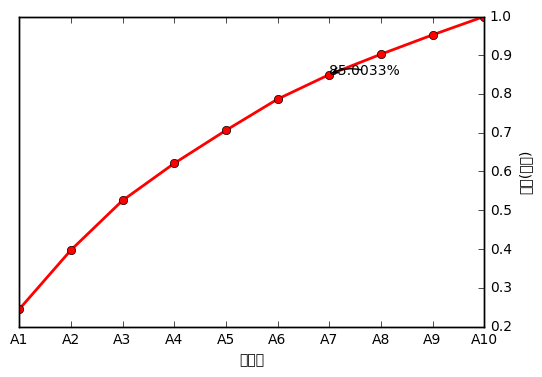

In [217]:
plt.show()

In [94]:
data2=pd.read_excel('/home/x/桌面/demo/data/catering_sale_all.xls')

In [103]:
data2.corr()

,百合酱蒸凤爪,翡翠蒸香茜饺,金银蒜汁蒸排骨,乐膳真味鸡,蜜汁焗餐包,生炒菜心,铁板酸菜豆腐,香煎韭菜饺,香煎罗卜糕,原汁原味菜心
百合酱蒸凤爪,1.000000,0.009206,0.016799,0.455638,0.098085,0.308496,0.204898,0.127448,-0.090276,0.428316
翡翠蒸香茜饺,0.009206,1.000000,0.304434,-0.012279,0.058745,-0.180446,-0.026908,0.062344,0.270276,0.020462
金银蒜汁蒸排骨,0.016799,0.304434,1.000000,0.035135,0.096218,-0.184290,0.187272,0.121543,0.077808,0.029074
乐膳真味鸡,0.455638,-0.012279,0.035135,1.000000,0.016006,0.325462,0.297692,-0.068866,-0.030222,0.421878
蜜汁焗餐包,0.098085,0.058745,0.096218,0.016006,1.000000,0.308454,0.502025,0.155428,0.171005,0.527844
生炒菜心,0.308496,-0.180446,-0.184290,0.325462,0.308454,1.000000,0.369787,0.038233,0.049898,0.122988
铁板酸菜豆腐,0.204898,-0.026908,0.187272,0.297692,0.502025,0.369787,1.000000,0.095543,0.157958,0.567332
香煎韭菜饺,0.127448,0.062344,0.121543,-0.068866,0.155428,0.038233,0.095543,1.000000,0.178336,0.049689
香煎罗卜糕,-0.090276,0.270276,0.077808,-0.030222,0.171005,0.049898,0.157958,0.178336,1.000000,0.088980
原汁原味菜心,0.428316,0.020462,0.029074,0.421878,0.527844,0.122988,0.567332,0.049689,0.088980,1.000000


In [98]:
data2.corr()>0.5

,百合酱蒸凤爪,翡翠蒸香茜饺,金银蒜汁蒸排骨,乐膳真味鸡,蜜汁焗餐包,生炒菜心,铁板酸菜豆腐,香煎韭菜饺,香煎罗卜糕,原汁原味菜心
百合酱蒸凤爪,True,False,False,False,False,False,False,False,False,False
翡翠蒸香茜饺,False,True,False,False,False,False,False,False,False,False
金银蒜汁蒸排骨,False,False,True,False,False,False,False,False,False,False
乐膳真味鸡,False,False,False,True,False,False,False,False,False,False
蜜汁焗餐包,False,False,False,False,True,False,True,False,False,True
生炒菜心,False,False,False,False,False,True,False,False,False,False
铁板酸菜豆腐,False,False,False,False,True,False,True,False,False,True
香煎韭菜饺,False,False,False,False,False,False,False,True,False,False
香煎罗卜糕,False,False,False,False,False,False,False,False,True,False
原汁原味菜心,False,False,False,False,True,False,True,False,False,True


In [100]:
data2.corr()['原汁原味菜心']

百合酱蒸凤爪     0.428316
翡翠蒸香茜饺     0.020462
金银蒜汁蒸排骨    0.029074
乐膳真味鸡      0.421878
蜜汁焗餐包      0.527844
生炒菜心       0.122988
铁板酸菜豆腐     0.567332
香煎韭菜饺      0.049689
香煎罗卜糕      0.088980
原汁原味菜心     1.000000
Name: 原汁原味菜心, dtype: float64

In [118]:
x=np.linspace(0,4*np.pi,50)

In [119]:
y=np.sin(x)

In [120]:
plt.plot(x,y,'bp--')

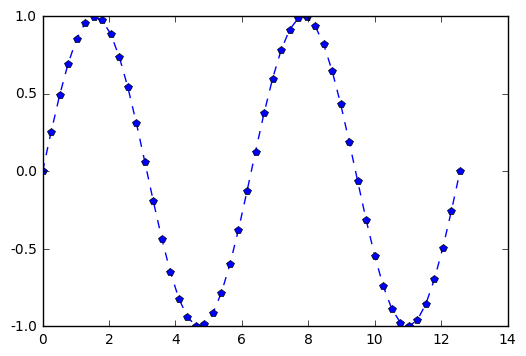

In [121]:
plt.show()

In [122]:
labels='Frogs','Hogs','Dogs','Hogs'#定义标签

In [123]:
sizes=[15,30,45,10]#每块占比

In [124]:
colors=['yellowgreen','gold','lightskyblue','lightcoral']#每块颜色

In [133]:
explode=(0,0.2,0,0)#突出显示第二快

In [140]:
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)

([<matplotlib.patches.Wedge at 0x7f45a850dd30>,
  <matplotlib.text.Text at 0x7f45a8531ba8>])

In [141]:
plt.axis('equal')

(-1.2025854230569264,
 1.027940084990864,
 -1.0246160299958926,
 1.0000000049123423)

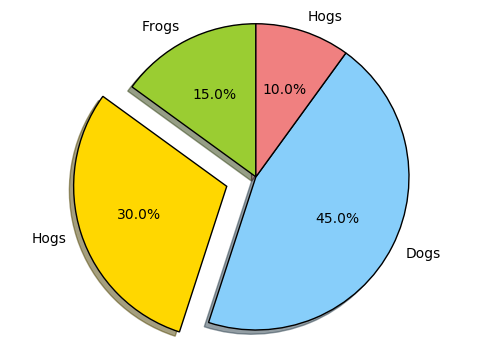

In [142]:
plt.show()

In [163]:
x=np.random.randn(1000)

In [164]:
plt.hist(x,10)

(array([  10.,   35.,   93.,  196.,  249.,  198.,  144.,   53.,   20.,    2.]),
 array([-2.94906165, -2.32600987, -1.70295808, -1.0799063 , -0.45685451,
         0.16619727,  0.78924905,  1.41230084,  2.03535262,  2.65840441,
         3.28145619]),
 <a list of 10 Patch objects>)

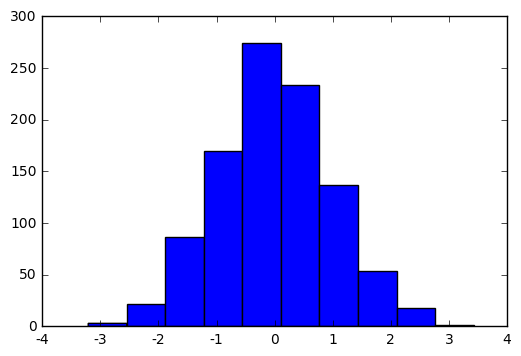

In [145]:
plt.show()

In [166]:
x=np.random.randn(1000)

In [167]:
D=pd.DataFrame([x,x+1]).T

In [170]:
D.plot(kind='box')

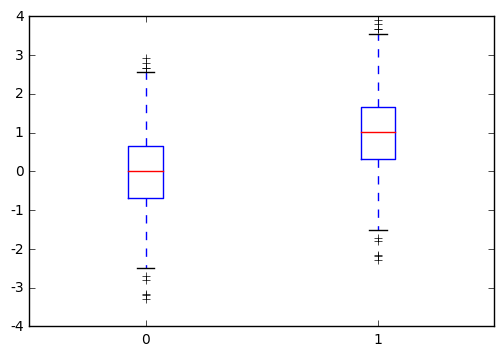

In [171]:
plt.show()

In [173]:
plt.rcParams['font.sans-serif']=['SimHei']

In [174]:
plt.rcParams['axes.unicode_minus']=False

In [175]:
x=pd.Series(np.exp(np.arange(20)))#原始数据

In [179]:
x.plot(label=u'YuanShuJu',legend=True)

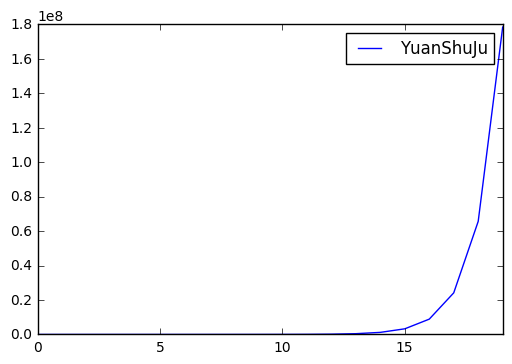

In [180]:
plt.show()

In [181]:
x.plot(logy=True,label=u'DuiShuSJ',legend=True)

/root/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


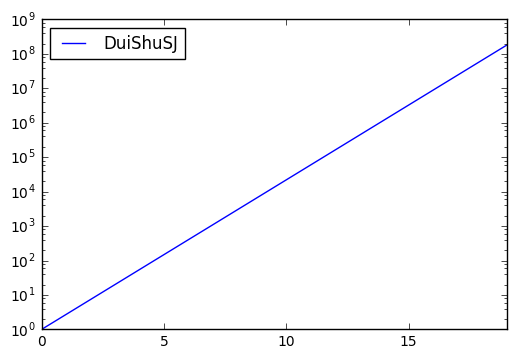

In [182]:
plt.show()

In [183]:
error=np.random.randn(10)

In [184]:
y=pd.Series(np.sin(np.arange(10)))

In [185]:
y.plot(yerr=error)

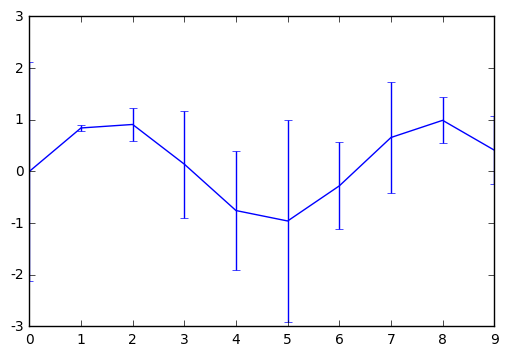

In [186]:
plt.show()

In [187]:
error,y

(array([-2.11684031,  0.04936043,  0.32604915, -1.03617905, -1.14517286,
        -1.94539609,  0.84328868,  1.06518872, -0.4452868 , -0.65738979]),
 0    0.000000
 1    0.841471
 2    0.909297
 3    0.141120
 4   -0.756802
 5   -0.958924
 6   -0.279415
 7    0.656987
 8    0.989358
 9    0.412118
 dtype: float64)

菜品名
A1     0.244385
A2     0.397016
A3     0.525190
A4     0.620940
A5     0.706061
A6     0.786679
A7     0.850033
A8     0.902518
A9     0.952524
A10    1.000000
Name: 盈利, dtype: float64